### 问题一：收集数据并分析中国主要行业之间的相互影响，包括正向促进和负向制约对经济发展的作用

#### 导入numpy、pandas、matplotlib、seaborn的模块

In [36]:
# 导入相关模块
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 防止绘图中文乱码
mpl.rcParams['font.family'] = 'SimHei'  # 使用黑体
mpl.rcParams['axes.unicode_minus'] = False  # 正确显示负号

#### 导入对应的各个产业数据

In [44]:
# 导入相关数据

df=pd.read_excel('../../data/近十年各行业生产总值数据表.xlsx',sheet_name='Sheet1')
df

# data = pd.DataFrame({
#     'Industry_A': [0.2, 0.3, 0.25, 0.28],
#     'Industry_B': [0.15, 0.35, 0.22, 0.30],
#     'Industry_C': [0.4, 0.25, 0.30, 0.35]
# })


,年份,国民总收入,国内生产总值,第一产业,第二产业,第三产业,农林牧渔业,工业,建筑业,批发和零售业,交通运输、仓储和邮政业,住宿和餐饮业,金融业,房地产业,其他,人均国民总收入 (元),人均国内生产总值 (元)
0,2014,644380.2,643563.1,55626.3,277282.8,310654.0,57472.2,233197.4,45401.7,63170.4,28534.4,11228.7,46853.4,38086.4,119618.5,46971,46912
1,2015,685571.2,688858.2,57774.6,281338.9,349744.7,59852.6,234968.9,47761.3,67719.6,30519.5,12306.1,56299.8,42573.8,136856.5,49684,49922
2,2016,742694.1,746395.1,60139.2,295427.8,390828.1,62451.0,245406.4,51498.9,73724.5,33028.7,13607.8,59964.0,49969.4,156744.3,53516,53783
3,2017,830945.7,832035.9,62099.5,331580.5,438355.9,64660.0,275119.3,57905.6,81156.6,37121.9,15056.0,64844.3,57086.0,179086.3,59514,59592
4,2018,915243.5,919281.1,64745.2,364835.2,489700.8,67558.7,301089.3,65493.0,88903.7,40337.2,16520.6,70610.3,64623.0,204145.2,65246,65534
5,2019,983751.2,986515.2,70473.6,380670.6,535371.0,73576.9,311858.7,70648.1,95650.9,42466.3,17903.1,76250.6,70444.8,227715.8,69881,70078
6,2020,1005451.3,1013567.0,78030.9,383562.4,551973.7,81396.5,312902.9,72444.7,96086.1,40582.9,15285.4,83617.7,73425.3,237825.3,71253,71828
7,2021,1141230.8,1149237.0,83216.5,451544.1,614476.4,86994.8,374545.6,78741.2,110147.0,48423.9,18026.9,90308.7,77215.9,264833.0,80803,81370
8,2022,1194401.4,1204724.0,88207.0,473789.9,642727.1,92576.8,395043.7,80766.0,116294.1,51076.9,17755.0,93285.3,73766.1,284160.2,84579,85310
9,2023,1249990.6,1260582.1,89755.2,482588.5,688238.4,94462.6,399103.1,85691.1,123072.4,57819.8,21023.6,100676.6,73722.7,305010.2,88607,89358


In [38]:
# df.columns[['年份', '国民总收入', '国内生产总值', '第一产业', '第二产业', '第三产业', '农林牧渔业', '工业', '建筑业', '批发和零售业', '交通运输、仓储和邮政业', '住宿和餐饮业', '金融业', '房地产业', '其他', '人均国民总收入 (元)', '人均国内生产总值 (元)']]
# df1 = df

# 选择特定的列来创建一个新的DataFrame
df1 = df[['国内生产总值', '农林牧渔业', '工业', '建筑业', '批发和零售业', '交通运输、仓储和邮政业', '住宿和餐饮业', '金融业', '房地产业', '其他']]

df1

,国内生产总值,农林牧渔业,工业,建筑业,批发和零售业,交通运输、仓储和邮政业,住宿和餐饮业,金融业,房地产业,其他
0,643563.1,57472.2,233197.4,45401.7,63170.4,28534.4,11228.7,46853.4,38086.4,119618.5
1,688858.2,59852.6,234968.9,47761.3,67719.6,30519.5,12306.1,56299.8,42573.8,136856.5
2,746395.1,62451.0,245406.4,51498.9,73724.5,33028.7,13607.8,59964.0,49969.4,156744.3
3,832035.9,64660.0,275119.3,57905.6,81156.6,37121.9,15056.0,64844.3,57086.0,179086.3
4,919281.1,67558.7,301089.3,65493.0,88903.7,40337.2,16520.6,70610.3,64623.0,204145.2
5,986515.2,73576.9,311858.7,70648.1,95650.9,42466.3,17903.1,76250.6,70444.8,227715.8
6,1013567.0,81396.5,312902.9,72444.7,96086.1,40582.9,15285.4,83617.7,73425.3,237825.3
7,1149237.0,86994.8,374545.6,78741.2,110147.0,48423.9,18026.9,90308.7,77215.9,264833.0
8,1204724.0,92576.8,395043.7,80766.0,116294.1,51076.9,17755.0,93285.3,73766.1,284160.2
9,1260582.1,94462.6,399103.1,85691.1,123072.4,57819.8,21023.6,100676.6,73722.7,305010.2


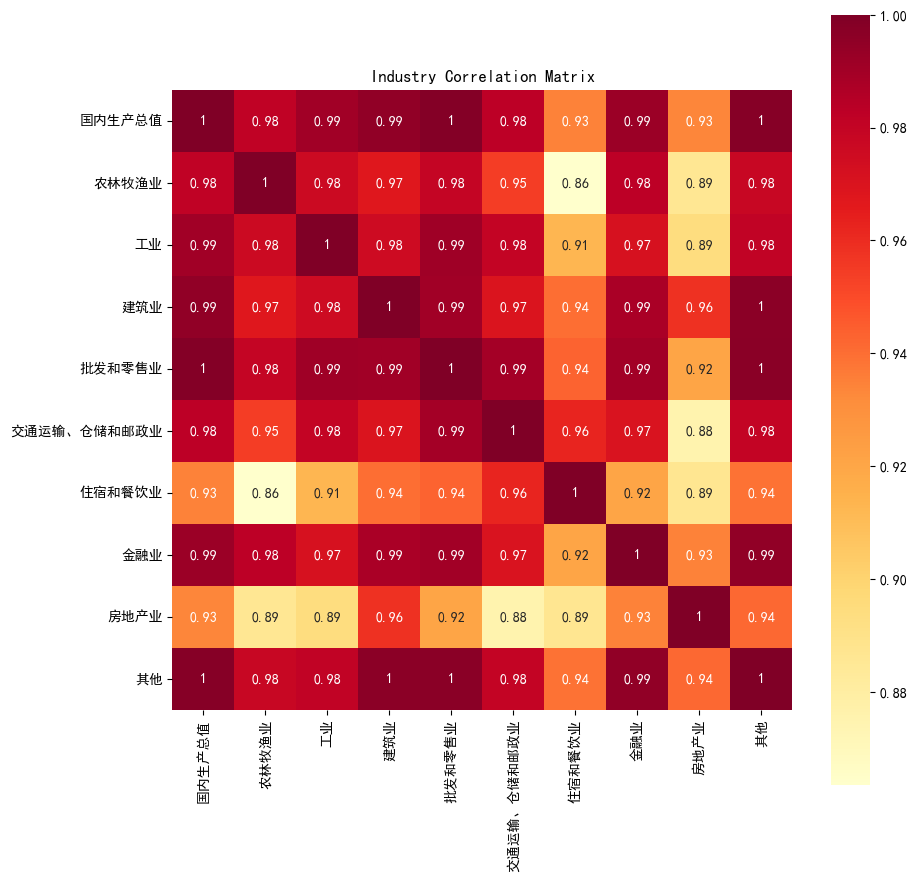

In [39]:
# 1. 相关分析

correlation_matrix = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='YlOrRd')
plt.title("Industry Correlation Matrix(行业相关性矩阵)")
plt.show()

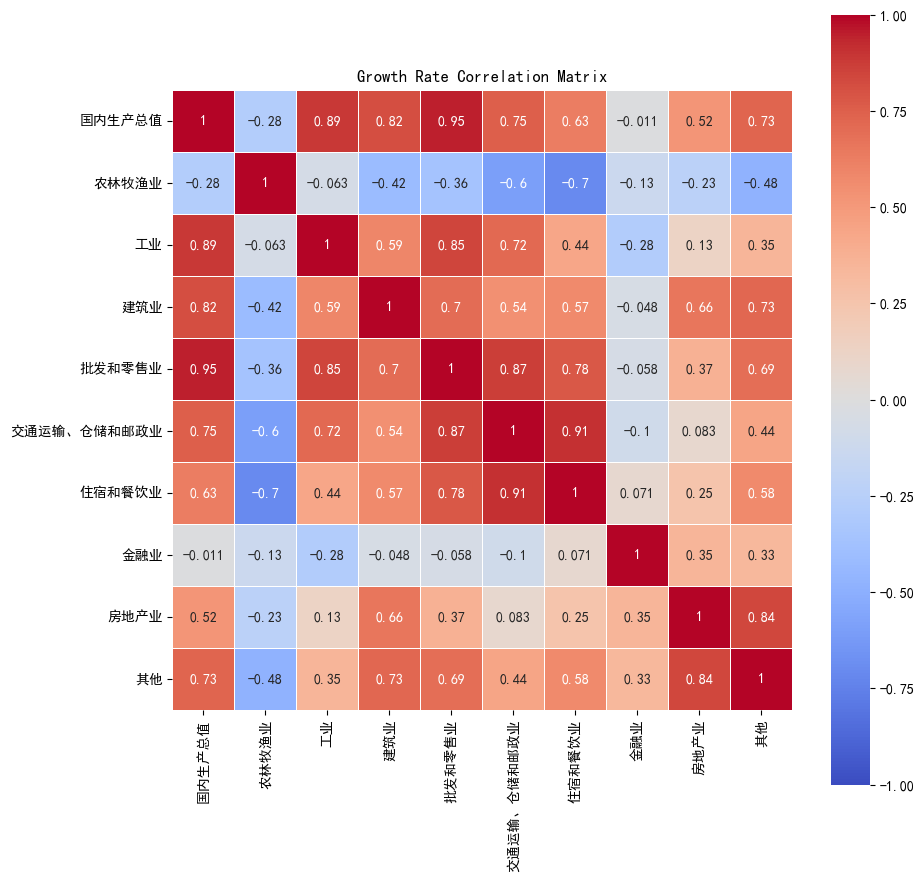

In [45]:
# 计算各行业的同比增长率
df_growth = df1.pct_change().dropna()

# 计算相关矩阵
correlation_growth = df_growth.corr()

# 绘制增长率的相关性热力图
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_growth, vmax=1, vmin=-1, square=True, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Growth Rate Correlation Matrix")
plt.show()


In [41]:
# 导入相关数据

df=pd.read_excel('../../data/近十年各行业生产总值数据表.xlsx',sheet_name='Sheet1')
df

# data = pd.DataFrame({
#     'Industry_A': [0.2, 0.3, 0.25, 0.28],
#     'Industry_B': [0.15, 0.35, 0.22, 0.30],
#     'Industry_C': [0.4, 0.25, 0.30, 0.35]
# })


,年份,国民总收入,国内生产总值,第一产业,第二产业,第三产业,农林牧渔业,工业,建筑业,批发和零售业,交通运输、仓储和邮政业,住宿和餐饮业,金融业,房地产业,其他,人均国民总收入 (元),人均国内生产总值 (元)
0,2014,644380.2,643563.1,55626.3,277282.8,310654.0,57472.2,233197.4,45401.7,63170.4,28534.4,11228.7,46853.4,38086.4,119618.5,46971,46912
1,2015,685571.2,688858.2,57774.6,281338.9,349744.7,59852.6,234968.9,47761.3,67719.6,30519.5,12306.1,56299.8,42573.8,136856.5,49684,49922
2,2016,742694.1,746395.1,60139.2,295427.8,390828.1,62451.0,245406.4,51498.9,73724.5,33028.7,13607.8,59964.0,49969.4,156744.3,53516,53783
3,2017,830945.7,832035.9,62099.5,331580.5,438355.9,64660.0,275119.3,57905.6,81156.6,37121.9,15056.0,64844.3,57086.0,179086.3,59514,59592
4,2018,915243.5,919281.1,64745.2,364835.2,489700.8,67558.7,301089.3,65493.0,88903.7,40337.2,16520.6,70610.3,64623.0,204145.2,65246,65534
5,2019,983751.2,986515.2,70473.6,380670.6,535371.0,73576.9,311858.7,70648.1,95650.9,42466.3,17903.1,76250.6,70444.8,227715.8,69881,70078
6,2020,1005451.3,1013567.0,78030.9,383562.4,551973.7,81396.5,312902.9,72444.7,96086.1,40582.9,15285.4,83617.7,73425.3,237825.3,71253,71828
7,2021,1141230.8,1149237.0,83216.5,451544.1,614476.4,86994.8,374545.6,78741.2,110147.0,48423.9,18026.9,90308.7,77215.9,264833.0,80803,81370
8,2022,1194401.4,1204724.0,88207.0,473789.9,642727.1,92576.8,395043.7,80766.0,116294.1,51076.9,17755.0,93285.3,73766.1,284160.2,84579,85310
9,2023,1249990.6,1260582.1,89755.2,482588.5,688238.4,94462.6,399103.1,85691.1,123072.4,57819.8,21023.6,100676.6,73722.7,305010.2,88607,89358


In [46]:
from statsmodels.formula.api import ols
# 2. 回归分析
model = ols('Industry_A ~ Industry_B + Industry_C', data=df1).fit()
print(model.summary())

# 3. 投入产出分析（假设数据来自投入产出表）
input_output_matrix = np.array([
    [0.4, 0.1, 0.2],  # A对其他产业的投入
    [0.2, 0.5, 0.3],  # B对其他产业的投入
    [0.1, 0.2, 0.4]   # C对其他产业的投入
])

PatsyError: Error evaluating factor: NameError: name 'Industry_C' is not defined
    Industry_A ~ Industry_B + Industry_C
                              ^^^^^^^^^^

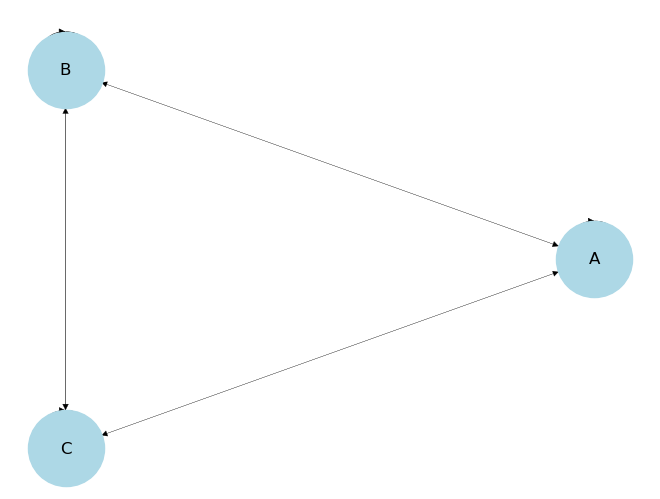

In [43]:
import networkx as nx

# 构建投入产出关系网络
G = nx.DiGraph()
industries = ['A', 'B', 'C']
for i in range(len(industries)):
    for j in range(len(industries)):
        if input_output_matrix[i, j] > 0:
            G.add_edge(industries[i], industries[j], weight=input_output_matrix[i, j])

# 绘图
pos = nx.circular_layout(G)
edges = G.edges(data=True)
weights = [d['weight'] for (_, _, d) in edges]
nx.draw(G, pos, with_labels=True, width=weights, node_color='lightblue', node_size=3000)
plt.show()
